In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_blobs

In [2]:
%matplotlib inline

In [3]:
def plot_data(X, y, ax=None):
    if ax is None:
        ax = plt.gca()
    plt.sca(ax)
    sns.scatterplot(X[:,0], X[:, 1], hue=y)

In [4]:
def plot_boundary(clf, color='k', ax=None):
    if ax is None:
        ax = plt.gca()
    
    # define bounds of the domain
    min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    
    # define the x and y scale
    x1grid = np.linspace(min1, max1, int((max1-min1)/0.1))
    x2grid = np.linspace(min2, max2, int((max2-min2)/0.1))
    
    # create all of the lines and rows of the grid
    xx, yy = np.meshgrid(x1grid, x2grid)
    
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))
    
    # make predictions for the grid
    yhat = clf.predict(grid)
    
    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)
    
    # plot the grid of x, y and z values as a surface
    ax.contour(xx, yy, zz, colors=[color])

In [5]:
def plot_data_and_boundary(X, y, CLF, ax=None, title=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    
    if title is not None:
        ax.set_title(title)
    
    clf = CLF(**kwargs).fit(X, y)
    plot_boundary(clf, ax=ax)
    plot_data(X, y, ax=ax)

In [6]:
X, y = make_blobs(
    n_samples=400,
    n_features=2,
    cluster_std=2,
    centers=2,
    random_state=42
)

/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


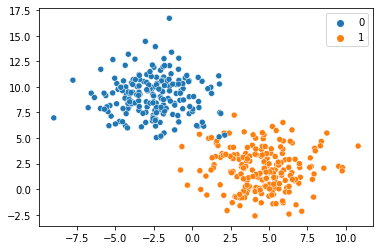

In [7]:
plot_data(X, y)

## Modelling

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [13]:
pca = PCA().fit(X)
X_pca = pca.transform(X)

/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


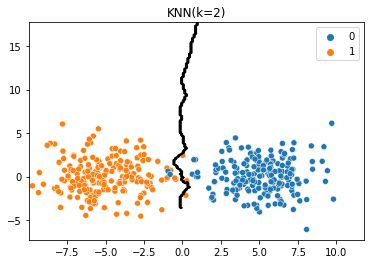

In [16]:
plot_data_and_boundary(X_pca, y, KNeighborsClassifier, n_neighbors=10, title='KNN(k=2)')

/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


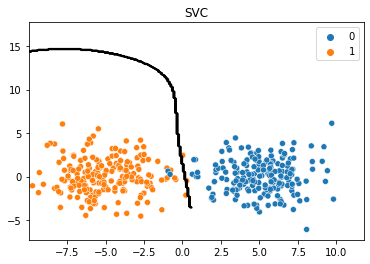

In [14]:
plot_data_and_boundary(X_pca, y, SVC, title='SVC')

/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


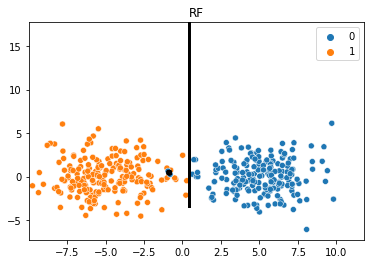

In [15]:
plot_data_and_boundary(X_pca, y, RandomForestClassifier, title='RF')

/home/nb315/anaconda3/envs/data-science/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


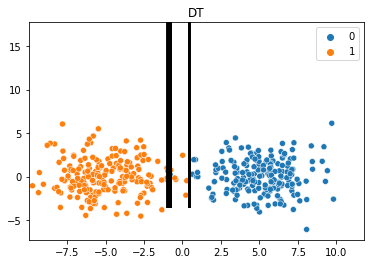

In [12]:
plot_data_and_boundary(X_pca, y, DecisionTreeClassifier, title='DT')

TypeError: 'Pipeline' object is not callable

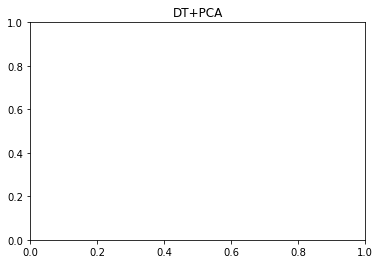